In [ ]:
!pip install datasets pandas torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121

In [ ]:
!pip install arabic-reshaper python-bidi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
data = load_dataset('fahdsoliman/NAITS_LFQA_with_supports_v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
data = data['train']

In [ ]:
df = pd.json_normalize(data)

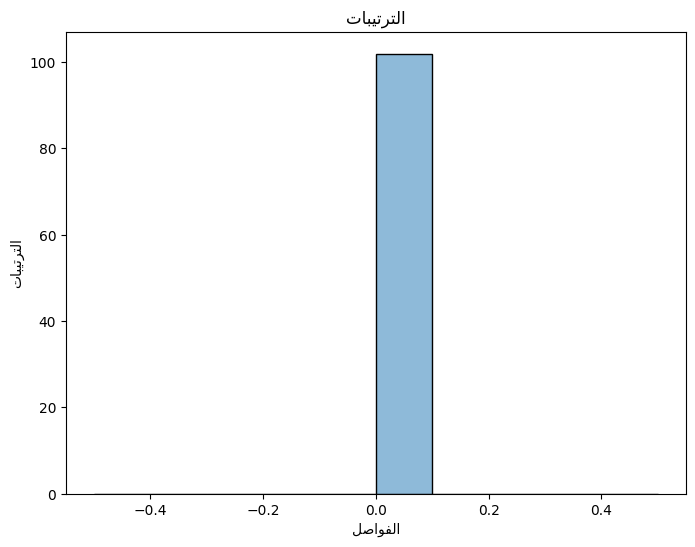

In [ ]:
# توزيع الدرجات

xlbl = get_display( arabic_reshaper.reshape('الفواصل'))
ylbl = get_display( arabic_reshaper.reshape('الترتيبات'))
titlelbl = get_display( arabic_reshaper.reshape('الترتيبات'))
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=10, kde=True)
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None)
plt.title(titlelbl, fontdict=None)
plt.show()


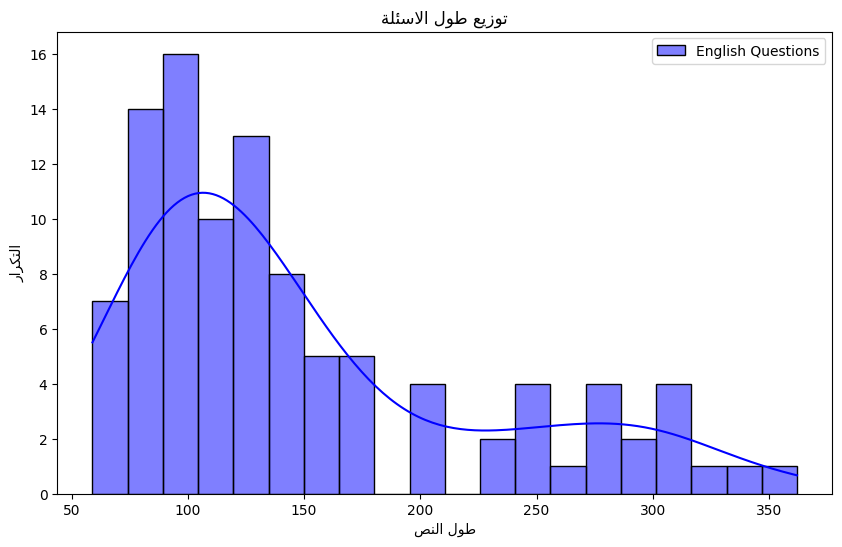

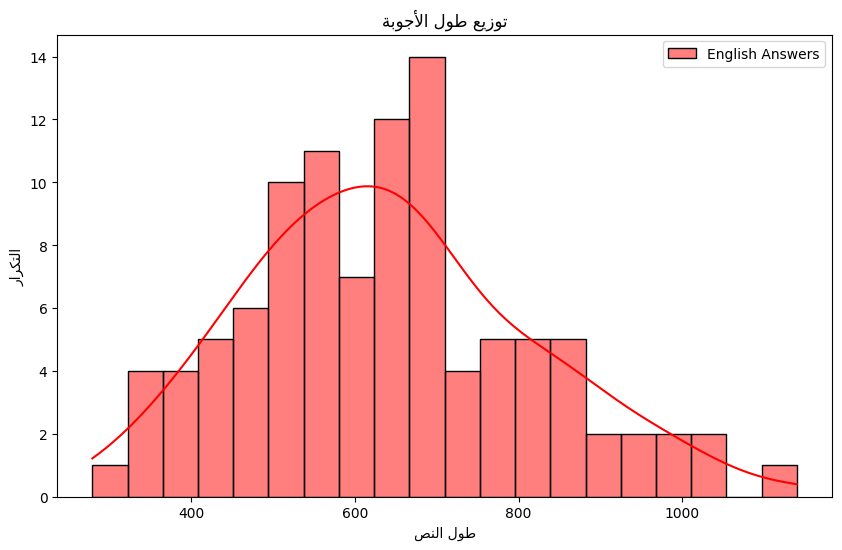

In [ ]:
df['question_length'] = df['question'].apply(len)
df['ar_question_length'] = df['ar_question'].apply(len)
df['answer_length'] = df['answer'].apply(len)
df['ar_answer_length'] = df['ar_answer'].apply(len)

xlbl = get_display( arabic_reshaper.reshape('طول النص'))
ylbl = get_display( arabic_reshaper.reshape('التكرار'))
titlelbl = get_display( arabic_reshaper.reshape('توزيع طول الاسئلة'))


# توزيع طول الأسئلة
plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], color='blue', label='English Questions', kde=True, bins=20)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.legend()
plt.title(titlelbl)
plt.show()


xlbl = get_display( arabic_reshaper.reshape('طول النص'))
ylbl = get_display( arabic_reshaper.reshape('التكرار'))
titlelbl = get_display( arabic_reshaper.reshape('توزيع طول الأجوبة'))


# توزيع طول الأجوبة
plt.figure(figsize=(10, 6))
sns.histplot(df['answer_length'], color='red', label='English Answers', kde=True, bins=20)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.legend()
plt.title(titlelbl)
plt.show()


In [ ]:
# توزيع الأسئلة حسب اللغة
df['language'] = df.apply(lambda x: 'Arabic' if pd.notna(x['ar_question']) else 'English', axis=1)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='language')
plt.xlabel('اللغة')
plt.ylabel('عدد الأسئلة')
plt.title('توزيع الأسئلة حسب اللغة')
plt.show()


In [ ]:
# مقارنة طول النصوص بين اللغتين
plt.figure(figsize=(12, 6))
df_long = df.melt(id_vars=['id'], value_vars=['question_length', 'ar_question_length', 'answer_length', 'ar_answer_length'],
                  var_name='text_type', value_name='length')

df_long['text_type'] = df_long['text_type'].map({
    'question_length': 'English Question',
    'ar_question_length': 'Arabic Question',
    'answer_length': 'English Answer',
    'ar_answer_length': 'Arabic Answer'
})

sns.boxplot(data=df_long, x='text_type', y='length')
plt.xlabel('نوع النص')
plt.ylabel('الطول')
plt.title('مقارنة طول النصوص بين اللغتين')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# حساب عدد الأسئلة لكل مرجع
reference_counts = df['reference'].value_counts().reset_index()
reference_counts.columns = ['reference', 'count']


In [ ]:
# رسم المخطط البياني
plt.figure(figsize=(12, 6))
sns.barplot(data=reference_counts, x='reference', y='count', palette='viridis')
plt.xlabel('المرجع')
plt.ylabel('عدد الأسئلة')
plt.title('توزيع الأسئلة حسب المرجع')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# حساب عدد الأسئلة لكل مرجع
reference_counts = df['reference'].value_counts().reset_index()
reference_counts.columns = ['reference', 'count']

# رسم المخطط البياني
plt.figure(figsize=(12, 6))
sns.barplot(data=reference_counts, x='reference', y='count', palette='viridis')
plt.xlabel('مصدر البيانات', fontproperties=arabic_font)
plt.ylabel('عدد الأسئلة', fontproperties=arabic_font)
plt.title('توزيع الأسئلة حسب مصدر البيانات', fontproperties=arabic_font)
plt.xticks(rotation=45, ha='right', fontproperties=arabic_font)
plt.tight_layout()
plt.show()

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display

# وظيفة لإعادة تشكيل النصوص العربية
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text


<ipython-input-11-50ff05d35ba1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reference_counts, x='reference', y='count', palette='viridis')


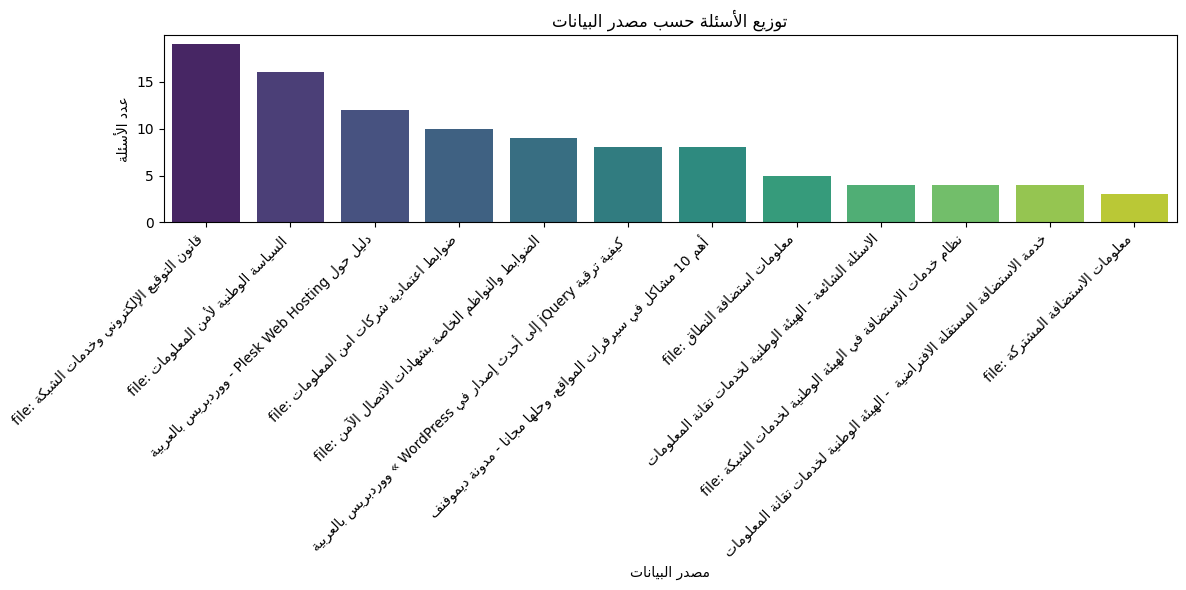

In [ ]:
df = pd.json_normalize(data)

# حساب عدد الأسئلة لكل مرجع
reference_counts = df['reference'].value_counts().reset_index()
reference_counts.columns = ['reference', 'count']

# تحويل النصوص العربية باستخدام arabic_reshaper و python-bidi
reference_counts['reference'] = reference_counts['reference'].apply(reshape_arabic)

# النصوص المعاد تشكيلها
xlbl = reshape_arabic('مصدر البيانات')
ylbl = reshape_arabic('عدد الأسئلة')
titlelbl = reshape_arabic('توزيع الأسئلة حسب مصدر البيانات')

# رسم المخطط البياني
plt.figure(figsize=(12, 6))
sns.barplot(data=reference_counts, x='reference', y='count', palette='viridis')
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.title(titlelbl)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-12-37497db6c4ed>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=reference_counts, x='reference', y='count', palette='viridis')


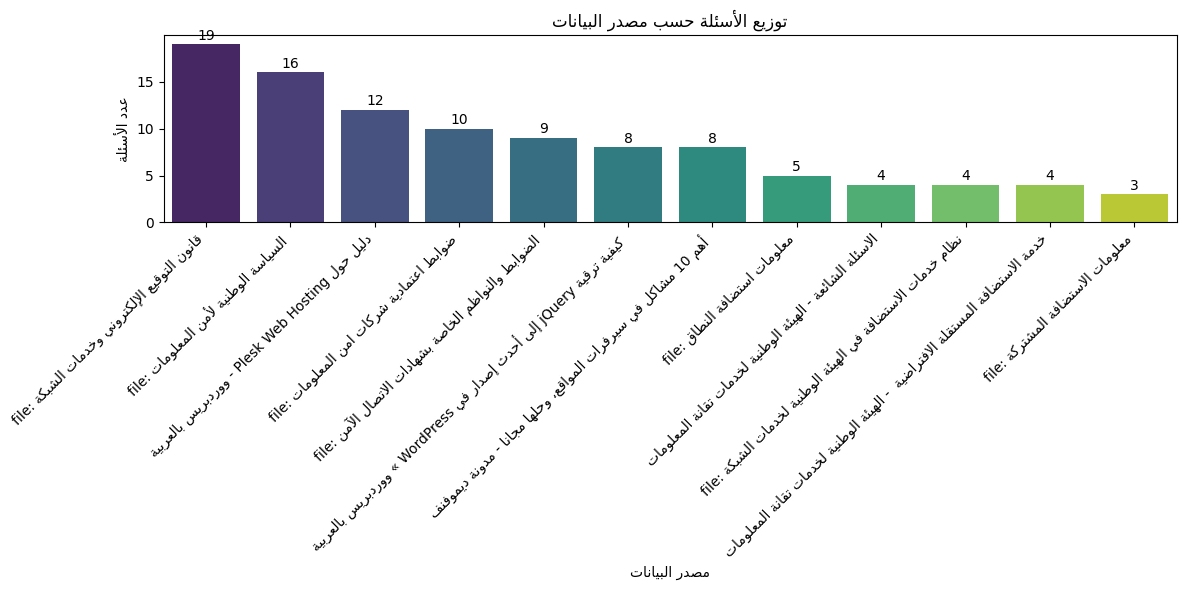

In [ ]:

# وظيفة لإعادة تشكيل النصوص العربية
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# حساب عدد الأسئلة لكل مرجع
reference_counts = df['reference'].value_counts().reset_index()
reference_counts.columns = ['reference', 'count']

# تحويل النصوص العربية باستخدام arabic_reshaper و python-bidi
reference_counts['reference'] = reference_counts['reference'].apply(reshape_arabic)

# النصوص المعاد تشكيلها
xlbl = reshape_arabic('مصدر البيانات')
ylbl = reshape_arabic('عدد الأسئلة')
titlelbl = reshape_arabic('توزيع الأسئلة حسب مصدر البيانات')

# رسم المخطط البياني
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=reference_counts, x='reference', y='count', palette='viridis')

# إضافة الأرقام على كل مستطيل
for index, row in reference_counts.iterrows():
    bar_plot.text(index, row['count'] + 0.5, row['count'], color='black', ha="center")

plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.title(titlelbl)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


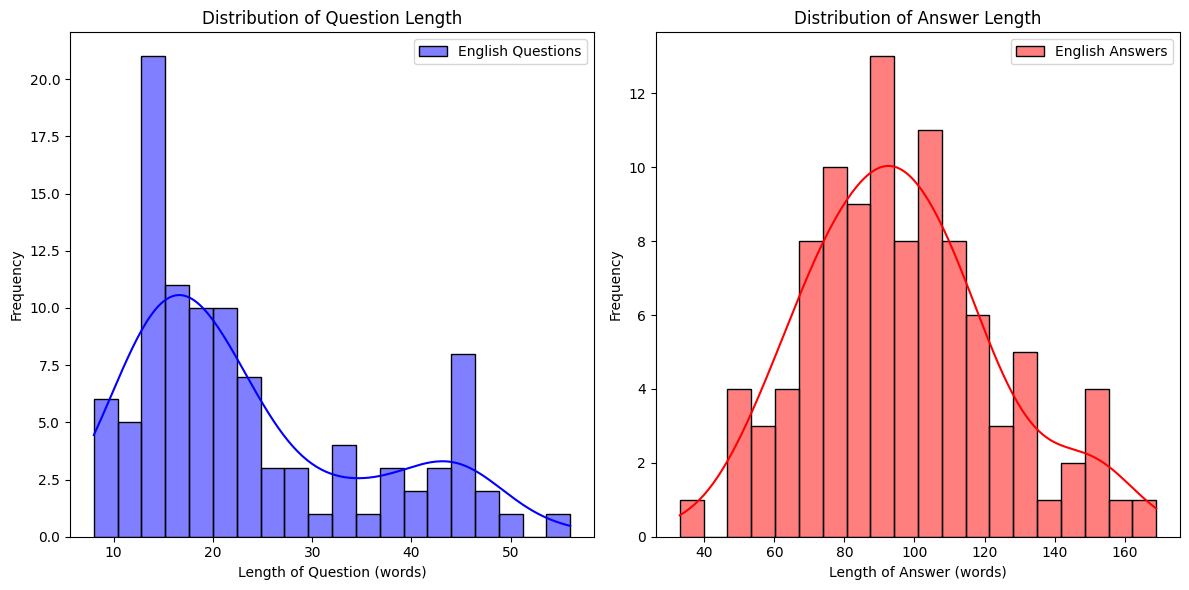

In [ ]:


# حساب عدد الكلمات في الأسئلة والأجوبة
df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
df['answer_word_count'] = df['answer'].apply(lambda x: len(x.split()))

# إنشاء الرسوم البيانية لتوزيع أطوال الأسئلة والأجوبة
plt.figure(figsize=(12, 6))

# توزيع طول الأسئلة
plt.subplot(1, 2, 1)
sns.histplot(df['question_word_count'], bins=20, kde=True, color='blue', label='English Questions')
plt.xlabel('Length of Question (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Question Length')
plt.legend()

# توزيع طول الأجوبة
plt.subplot(1, 2, 2)
sns.histplot(df['answer_word_count'], bins=20, kde=True, color='red', label='English Answers')
plt.xlabel('Length of Answer (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Length')
plt.legend()

# ضبط التخطيط والعرض
plt.tight_layout()
plt.show()
